## Supermarket Store Branches’ Sales Analysis
Analyzing Stores sales and their dependence on stores area and daily customer count

### About Dataset
A supermarket is a self-service shop offering a wide variety of food, beverages, and household products, 
organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores 
but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In 
everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to 
other types of stores that sell groceries

### Inspiration
Analyzing the performances of stores in the past on basis of which will try to rectify defects as well as to 
leverage the positives.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Stores.csv")
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


#### They are 896 rows and five columns

In [4]:
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### There are 896 records for each variable.


## Data Inspection

In [7]:
df.tail(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
886,887,1655,1986,1150,77430
887,888,1156,1398,140,92370
888,889,1451,1734,670,34880
889,890,1539,1829,650,46580
890,891,1549,1851,1220,70620
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [8]:
# Correlation between the physical area of the store and the sales
print(df['Store_Area'].corr(df['Store_Sales']))



0.0974737953948051


In [9]:
# Stores with the highest sales

In [10]:
# top 5 Store_Sales with the most purchases
top5_Store_Sales = df['Store_Sales'].value_counts().head()
top5_Store_Sales

Store_Sales
54590    3
63540    3
74080    2
63660    2
77120    2
Name: count, dtype: int64

In [11]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [12]:
# Stores with the lowest sales
print(df[df['Store_Sales'] == df['Store_Sales'].min()])


    Store ID  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
31        32        1250             1508                   990        14920


In [13]:
df.sort_values(by="Store_Sales",ascending=False).head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [14]:
pd.set_option('display.max.rows',900)  
            

In [15]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [16]:
print(df.isnull().sum())

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


In [17]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [18]:
## Number of Stores by Area
df.sort_values(by="Store_Area",ascending=False).head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
466,467,2229,2667,660,87410
540,541,2214,2647,740,65900
91,92,2169,2617,600,67080
849,850,2067,2492,790,70230
398,399,2063,2493,810,51480
550,551,2049,2465,720,63510
628,629,2044,2408,380,82020
163,164,2044,2474,340,80340
567,568,2026,2400,720,51240
311,312,2019,2396,540,71570


In [19]:
## List of Store by Sales 
df.sort_values(by="Store_Sales",ascending=False).head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [20]:
## List of stores by number of items available
df.sort_values(by="Items_Available",ascending=False).head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
466,467,2229,2667,660,87410
540,541,2214,2647,740,65900
91,92,2169,2617,600,67080
398,399,2063,2493,810,51480
849,850,2067,2492,790,70230
163,164,2044,2474,340,80340
550,551,2049,2465,720,63510
469,470,2015,2436,680,77960
798,799,2019,2420,850,85670
649,650,1989,2414,860,116320


In [21]:
max_sales_store = df.iloc[df['Store_Sales'].idxmax()]
print(max_sales_store)

Store ID                   650
Store_Area                1989
Items_Available           2414
Daily_Customer_Count       860
Store_Sales             116320
Name: 649, dtype: int64


## Visualize max sales

In [22]:
min_sales_store = df.iloc[df['Store_Sales'].idxmin()]
print(min_sales_store)

Store ID                   32
Store_Area               1250
Items_Available          1508
Daily_Customer_Count      990
Store_Sales             14920
Name: 31, dtype: int64


## Visualise minimun sales

In [23]:
print(df.corr())

                      Store ID  Store_Area  Items_Available  \
Store ID              1.000000   -0.058705        -0.055707   
Store_Area           -0.058705    1.000000         0.998891   
Items_Available      -0.055707    0.998891         1.000000   
Daily_Customer_Count -0.010029   -0.041423        -0.040978   
Store_Sales           0.071486    0.097474         0.098849   

                      Daily_Customer_Count  Store_Sales  
Store ID                         -0.010029     0.071486  
Store_Area                       -0.041423     0.097474  
Items_Available                  -0.040978     0.098849  
Daily_Customer_Count              1.000000     0.008629  
Store_Sales                       0.008629     1.000000  


In [24]:
# Analyze the correlation between different features
correlation = df.corr()
print(correlation)

                      Store ID  Store_Area  Items_Available  \
Store ID              1.000000   -0.058705        -0.055707   
Store_Area           -0.058705    1.000000         0.998891   
Items_Available      -0.055707    0.998891         1.000000   
Daily_Customer_Count -0.010029   -0.041423        -0.040978   
Store_Sales           0.071486    0.097474         0.098849   

                      Daily_Customer_Count  Store_Sales  
Store ID                         -0.010029     0.071486  
Store_Area                       -0.041423     0.097474  
Items_Available                  -0.040978     0.098849  
Daily_Customer_Count              1.000000     0.008629  
Store_Sales                       0.008629     1.000000  


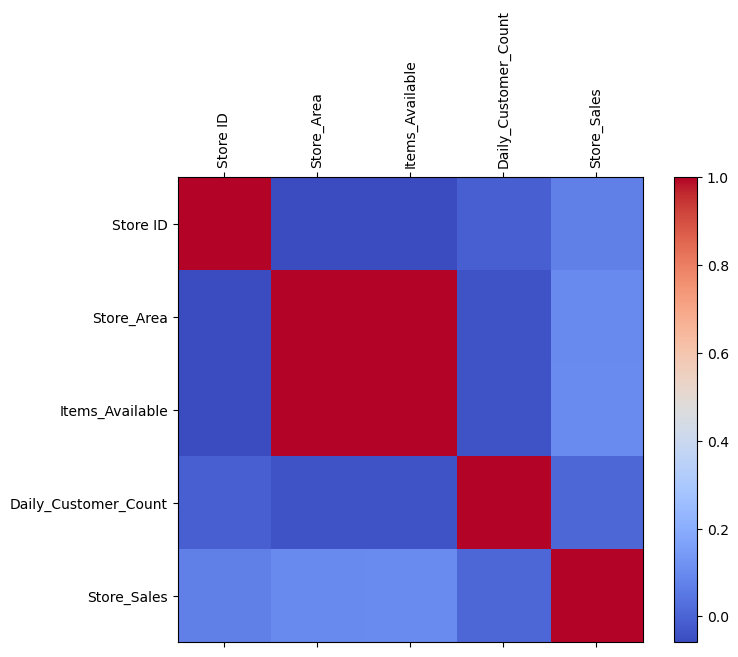

In [25]:
# Visualize the correlation
plt.figure(figsize=(8,6))
plt.matshow(correlation, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()

## Data Preprocessing/Wrangling


In [26]:
# confirm data types
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [27]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


### Analyze the relationship between store area and sales

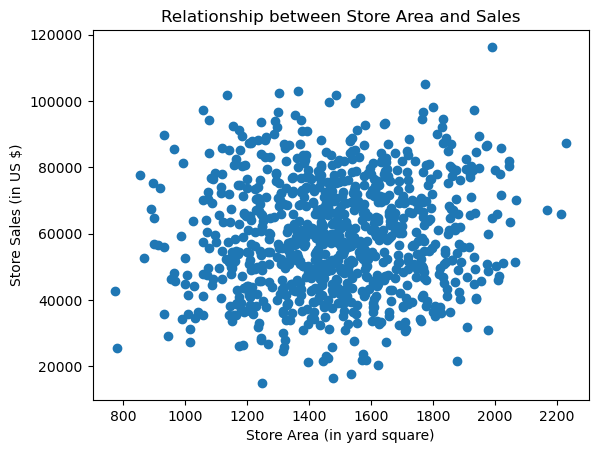

In [28]:

plt.scatter(df['Store_Area'], df['Store_Sales'])
plt.xlabel('Store Area (in yard square)')
plt.ylabel('Store Sales (in US $)')
plt.title('Relationship between Store Area and Sales')
plt.show()

## Relationship between the number of items available and the sales

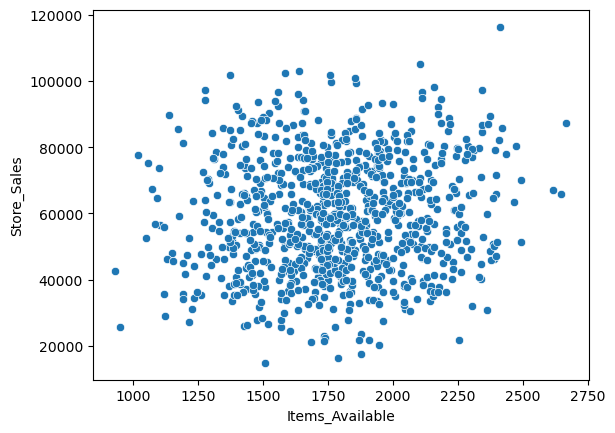

In [29]:
## Relationship between the number of items available and the sales
sns.scatterplot(data=df, x='Items_Available', y='Store_Sales')
plt.show()

In [30]:
# Sales per customer for each store
df['SalesPerCustomer'] = df['Store_Sales'] / df['Daily_Customer_Count']
print(df['SalesPerCustomer'])



0       125.452830
1       189.619048
2        75.013889
3        86.661290
4       103.600000
5        59.552632
6        70.135922
7        36.980392
8        68.102941
9        39.070796
10       65.394495
11       80.027778
12       57.590476
13       50.974138
14       86.181818
15       99.835443
16       53.645833
17       56.970149
18       61.689320
19       41.010204
20      117.459459
21       99.840580
22       55.557895
23       81.741935
24       49.857143
25       85.426829
26       23.472727
27       61.765306
28      110.000000
29      130.553846
30       80.949495
31       15.070707
32       68.704545
33      120.258065
34       71.009804
35       64.942857
36       68.147541
37       58.212963
38       54.623762
39     4548.000000
40       39.640000
41       80.233333
42       92.657534
43       50.935897
44       68.846154
45       56.632184
46       96.391304
47       68.714286
48       47.603175
49       73.413462
50       89.912088
51       44.484615
52      220.

## Daily customer count relate to the sales

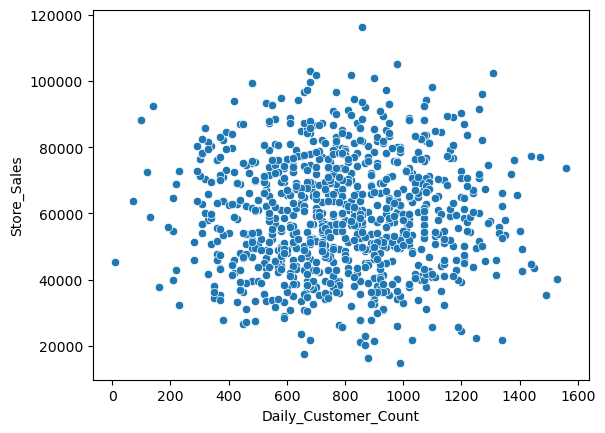

In [31]:
# Daily customer count relate to the sales
sns.scatterplot(data=df, x='Daily_Customer_Count', y='Store_Sales')
plt.show()


In [32]:
df.columns


Index(['Store ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'SalesPerCustomer'],
      dtype='object')

In [33]:
df2 = df.groupby('Store_Area')[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].max().sort_values(by='Store_Sales', ascending=False).head(5)
df2

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,,,,
1989,1989,2414,860,116320
1775,1775,2104,980,105150
1365,1365,1645,980,102920
1303,1303,1587,1310,102310
1486,1486,1758,820,101820


In [34]:
df3=df2.transpose()
df3

Store_Area,1989,1775,1365,1303,1486
Store_Area,1989,1775,1365,1303,1486
Items_Available,2414,2104,1645,1587,1758
Daily_Customer_Count,860,980,980,1310,820
Store_Sales,116320,105150,102920,102310,101820


<Axes: >

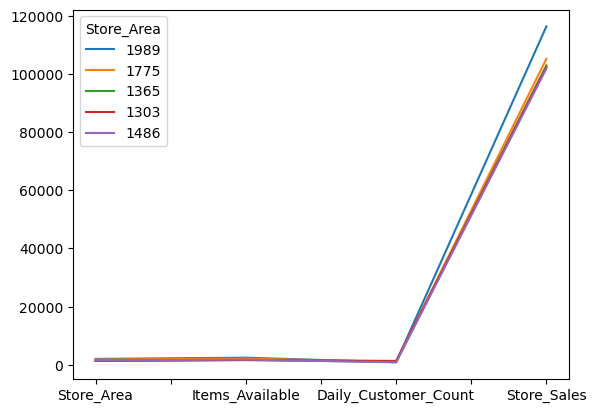

In [35]:
df3.plot()

In [36]:
df['SalesPerCustomer'] = df['Store_Sales'] / df['Daily_Customer_Count']

In [37]:
 df.groupby('Store_Sales').max().sort_values(by=['Daily_Customer_Count', 'SalesPerCustomer'], ascending=False).head(10)


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,SalesPerCustomer
Store_Sales,,,,,
73810,849,919,1099,1560,47.314103
40350,350,1886,2228,1530,26.372549
35420,536,1057,1262,1490,23.771812
77120,230,1921,2305,1470,87.636364
43640,313,1494,1806,1450,30.096552
77250,17,1578,1907,1440,53.645833
44660,335,1624,1973,1440,31.013889
49160,744,1418,1699,1410,56.505747
42670,84,1572,1884,1410,30.262411


In [38]:
df4=df.groupby('Store_Sales').max().sort_values(by=['Daily_Customer_Count', 'SalesPerCustomer'], ascending=False).head(10)
df4


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,SalesPerCustomer
Store_Sales,,,,,
73810,849,919,1099,1560,47.314103
40350,350,1886,2228,1530,26.372549
35420,536,1057,1262,1490,23.771812
77120,230,1921,2305,1470,87.636364
43640,313,1494,1806,1450,30.096552
77250,17,1578,1907,1440,53.645833
44660,335,1624,1973,1440,31.013889
49160,744,1418,1699,1410,56.505747
42670,84,1572,1884,1410,30.262411


In [39]:
df4.transpose()

Store_Sales,73810,40350,35420,77120,43640,77250,44660,49160,42670,54820
Store ID,849.000000,350.000000,536.000000,230.000000,313.000000,17.000000,335.000000,744.000000,84.000000,649.000000
Store_Area,919.000000,1886.000000,1057.000000,1921.000000,1494.000000,1578.000000,1624.000000,1418.000000,1572.000000,1514.000000
Items_Available,1099.000000,2228.000000,1262.000000,2305.000000,1806.000000,1907.000000,1973.000000,1699.000000,1884.000000,1794.000000
Daily_Customer_Count,1560.000000,1530.000000,1490.000000,1470.000000,1450.000000,1440.000000,1440.000000,1410.000000,1410.000000,1400.000000
SalesPerCustomer,47.314103,26.372549,23.771812,87.636364,30.096552,53.645833,31.013889,56.505747,30.262411,39.157143


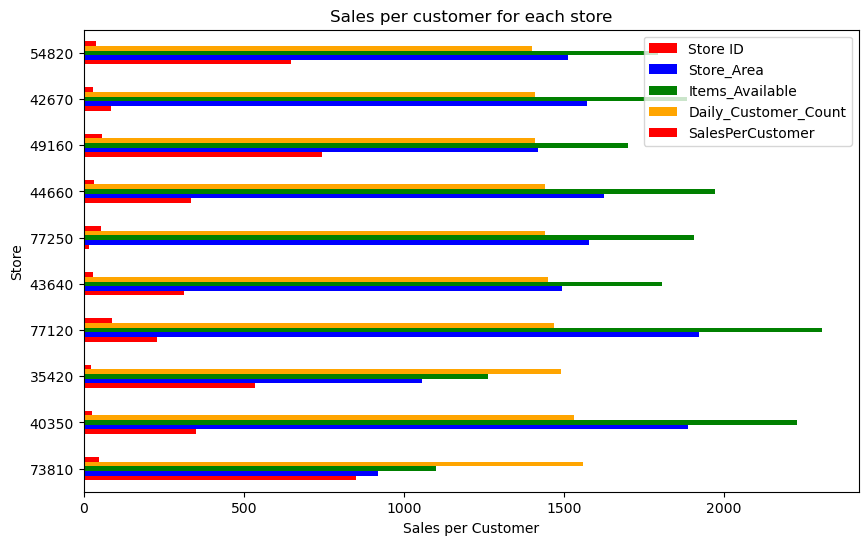

In [40]:
ax = df4.plot(kind='barh', figsize=(10, 6), color=['red', 'blue', 'green', 'orange'])

# Set plot title and labels
plt.title('Sales per customer for each store')
plt.xlabel('Sales per Customer')
plt.ylabel('Store')

# Reposition the legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

### Observation and Reccomendations

Inventory Turnover and Sales Efficiency, having a large inventory can potentially lead to higher sales, it's essential to manage inventory turnover effectively. Inventory turnover measures how quickly a store sells its inventory and replenishes stock. Stores with a high number of items available but low sales may indicate inefficient inventory management, leading to higher carrying costs and potential losses due to obsolete or expired inventory.

Variety and Customer Attraction, A wider variety of items available can attract more customers to the store, as it caters to diverse preferences and needs. Customers may be more inclined to visit and purchase from stores that offer a comprehensive range of products. Therefore, stores with a greater number of items available may experience higher foot traffic and, consequently, increased sales opportunities.

Sales Potential and Revenue, the number of items available directly affects the potential for sales. Stores with a larger inventory may have higher sales potential due to the availability of more products to sell. However, it's important to note that the relationship between items available and sales is not always linear. Factors such as product demand, pricing strategies, and customer preferences also influence sales performance.

Seasonal Variations and Trends,the relationship between items available and store sales may vary seasonally or based on trends. For example, stores may need to adjust their inventory levels to accommodate seasonal demand fluctuations or capitalize on emerging trends. Analyzing historical sales data alongside inventory levels can help identify patterns and optimize inventory planning to maximize sales opportunities.

Overall, the relationship between items available and store sales underscores the importance of effective inventory management in driving revenue growth and meeting customer demand while minimizing costs and maximizing profitability.